#   Configurando o Collab 

Para utilizar este notebook no Google Drive, é necessario importar o drive e montar o diretorio pelo menos uma vez para ter acesso aos arquivos do drive compartilhado.

Observe que apos o comando "cd" estaremos na raiz do diretorio compartilhado. 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/Shared\ drives/cd2019-trabalho
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shared drives/cd2019-trabalho
 AudioFeatures2
 AudioFeatures3
 AudioFeatures4
 AudioFeatures5
 AudioFeatures6
 AudioFeatures7
 AudioFeatures8
 AudioFeatures.ipynb
 AudioFeatures-SB
 audio-sandbox.ipynb
 bibliografia/
'Classificação musical com descritores de áudio.gslides'
 classifiers.ipynb
 cloud_fetch.ipynb
'Cópia de classifiers.ipynb'
 extracted_features/
 fma_metadata/
 fma_metadata.zip
 fma_small/
 fma_small.zip
 genres.tar.gz
 mfcc.ipynb
 pyAudioAnalysis/
 test.ipynb
'Wallace classifiers.ipynb'


# Adicionando bibliotecas, lendo o áudio e visualizando waveform

In [0]:
import librosa
import pandas as pd
import numpy as np
import math

import IPython.display as ipd # Tocando o audio

%matplotlib inline
import matplotlib.pyplot as plt   # Visualizando a waveform
import librosa.display

In [0]:
WIN_PERIOD = 50  # ms
SR = 22050

<class 'numpy.ndarray'> <class 'int'>
(660984,) 22050


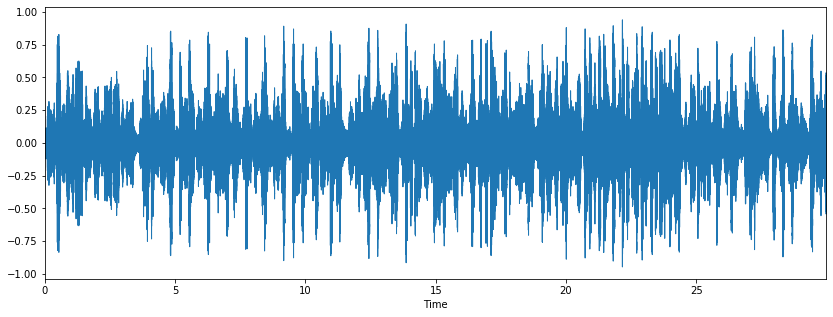

In [0]:
# Pegando uma musica como exemplo para leitura 
audio_path = 'fma_small/000/000002.mp3'
audio_time , sr = librosa.load(audio_path)

print(type(audio_time), type(sr))
print(audio_time.shape, sr)

ipd.Audio(audio_path) # tocando o audio

plt.figure(figsize=(14, 5)) #Visualizando a waveform
librosa.display.waveplot(audio_time, sr=sr)


Retornando um áudio em 22KHz, podemos alterar fazendo librosa.load(audio_path, sr=44100), por exemplo.

Temos aqui as ferramentas basicas para o trabalho.

### Função janeladora

In [0]:
def windows(seq, wlength=None, sr=None, wperiod=None, nw=None, overlap=0):
  seq_len = len(seq)
  
  if nw is None:
    if wlength is None:
      wlength = math.floor(wperiod/1000 * sr)
      
  else:
    wlength = seq_len // nw

  stride = math.floor((1 - overlap) * wlength)
  
  i = 0
  while i < seq_len:
    yield seq[i:i + wlength]
    i += stride

In [0]:
for w in windows(list(range(100)), sr=1000, wperiod=17):
  print(w, '\n')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] 

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] 

[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50] 

[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67] 

[68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84] 

[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99] 



# Zero Crossing

Avalia a mudança de sinal. Mudando de negativo para positivo ou positivo para negativo. Parece que e muito bom para identificar percursao.

Como pode-se observar a funçao implementada esta "defasada" em relaçao a funçao do librosa e por isso é melhor utilizar a da biblioteca.

(1, 43)
43


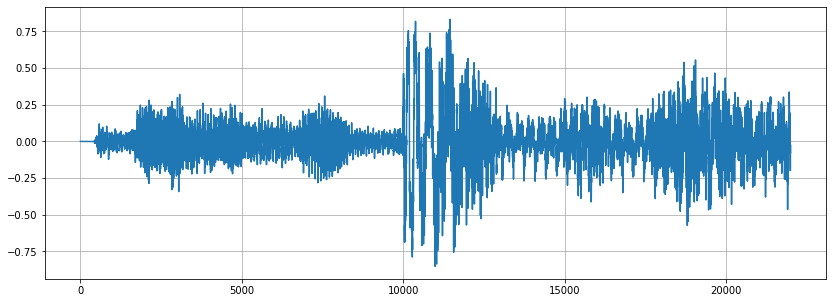

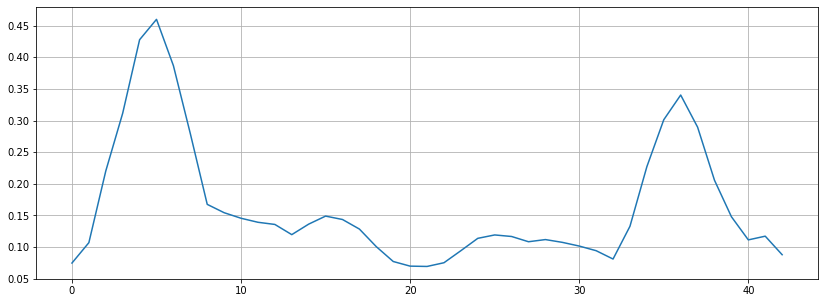

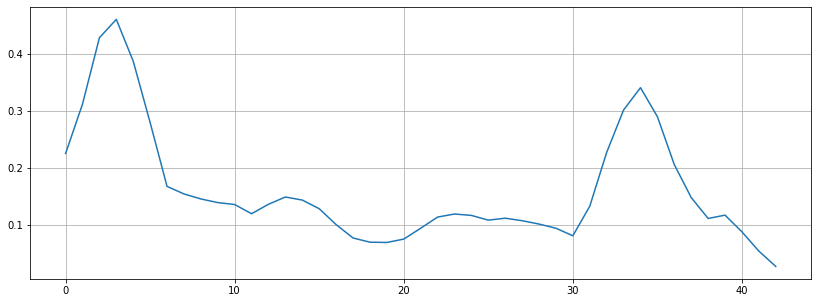

In [0]:
#Minha funçao de zero crossing rate!
def zero_crossing_rate(audio, frame_length=2048, hop_length=512):

  windows = int(audio.shape[0]/(hop_length)) + 1
  print(windows)
  rate = np.zeros(windows)

  for i in range(windows):
    counter = 0
    previus = audio[i * hop_length]
    for new in audio[(i * hop_length) + 1 : frame_length + (i * hop_length)]:
      if new * previus < 0:
        counter += 1

      previus = new
  
    rate[i] = counter / frame_length

  return rate

#Dando um zoom no exemplo do audio (Selecionando a regiao que sera analisada)
n0 = 0
n1 = 22000
plt.figure(figsize=(14, 5))
plt.plot(audio_time[n0:n1])
plt.grid()


# Plotando o grafico de zero crossing rate da librosa
zero_rate = librosa.feature.zero_crossing_rate(audio_time[n0:n1])
print(zero_rate.shape)
plt.figure(figsize=(14, 5))
plt.plot(zero_rate[0])
plt.grid()

# Chamando a funçao de zero crossing rate
teste = zero_crossing_rate(audio_time[n0 : n1])
plt.figure(figsize=(14, 5))
plt.plot(teste[n0:n1])
plt.grid()


# Short Term Energy

Retorna a potência do áudio

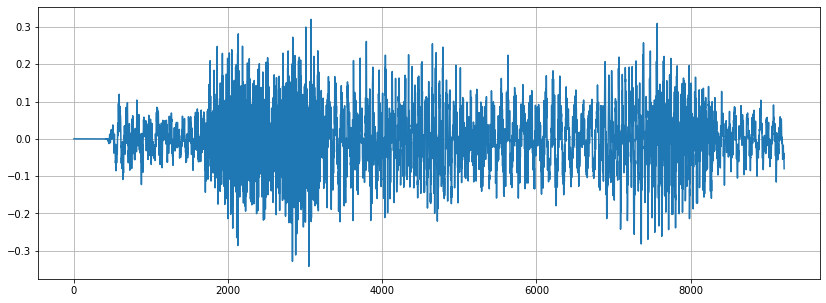

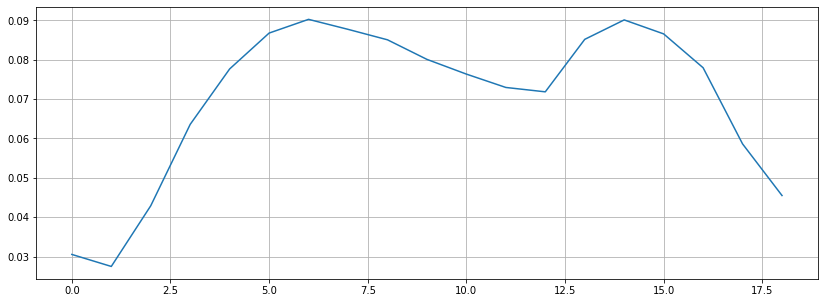

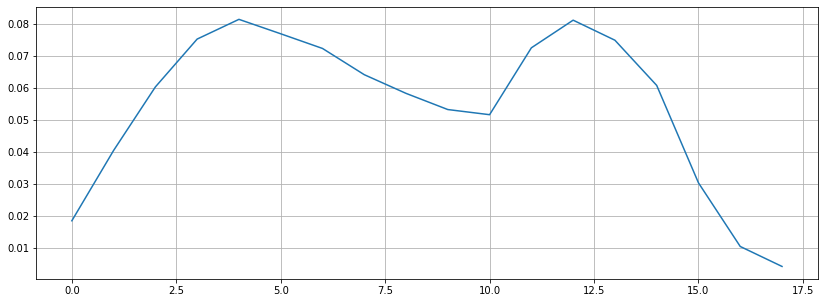

In [0]:
def short_term_energy(audio, frame_length=2048, hop_length=512):

  windows = int(audio.shape[0]/(hop_length))
  energy = np.zeros(windows)

  for i in range(windows):
    aux = 0
    for point in audio[i * hop_length : frame_length + i * hop_length]:
      aux += abs(point) ** 2
  
    energy[i] = aux / (frame_length + i * hop_length - i * hop_length) * 10

  return energy

#Dando um zoom no exemplo do audio (Selecionando a regiao que sera analisada)
n0 = 0
n1 = 9216
plt.figure(figsize=(14, 5))
plt.plot(audio_time[n0:n1])
plt.grid()


# Plotando o grafico de zero crossing rate da librosa
zero_rate = librosa.feature.rmse(audio_time[n0:n1])
plt.figure(figsize=(14, 5))
plt.plot(zero_rate[0])
plt.grid()

# Chamando a funçao de zero crossing rate
teste = short_term_energy(audio_time[n0 : n1])
plt.figure(figsize=(14, 5))
plt.plot(teste[n0:n1])
plt.grid()


# Entropy of Energy

Avalia as mudanças abruptas de energia

In [0]:
def entropy_energy(audio, frame_length=2048, nsubframes=24):

  sublength = int(frame_length / nsubframes)
  nframes = int(audio.shape[0]/frame_length)

  entropy = np.zeros(nframes)
  energy = np.zeros(nsubframes)

  # Calculando a energia de uma janela (frame)
  short_energy = short_term_energy(audio)
  
  print(short_energy.shape)

  for i in range(nframes - 1):
    #Calculando a energia de cada sub-frame. Retorna um vetor com a energia de cada sub-frame
    energy = short_term_energy(audio[i * frame_length : (i+1) * frame_length], sublength, int(sublength/4))
    #Divide a energia de cada sub-frame pela energia da janela (frame)
    energy /= short_energy[i]

    #Calcula a entropia
    for j in range(nsubframes):
      if(energy[j] != 0):
        entropy[i] +=  energy[j] * math.log2(energy[j]) 


  return entropy

# Descritores no espaço de frequências 


### Recuperar espectro

In [0]:
def windows_spectra(signal, *args, **kwargs):
  for w in windows(signal, *args, **kwargs):
    coefs = np.fft.fft(w)
    coefs = coefs[:len(coefs)//2]
    yield np.absolute(coefs)

In [0]:
def spectral_centroid(signal, *args, **kwargs):
  ret = []
  for spec_coefs in windows_spectra(signal, *args, **kwargs):
    mags = np.absolute(spec_coefs)
    # mags *= np.hanning(len(mags))  # Aply Hann's windowing function
    ret.append((mags * 10 * (np.arange(len(mags))+1)).sum() / mags.sum())
  
  return ret

In [0]:
def spectral_spread(signal, *args, **kwargs):
  centroids = spectral_centroid(signal)
  coefs = ((np.arange(len(centroids)) + 1) - centroids) ** 2
  
  ret = []
  for spec in windows_spectra(signal, *args, **kwargs):
    ret.append(np.sum(coefs * spec) / np.sum(spec))
  
  return ret

In [0]:
def spectral_entropy(signal, sw, *args, **kwargs):
  ret = []

  # Frame
  for w in windows(signal, *args, **kwargs):
    # Calculando cada sub_frame
    energies = []
    for sub_coefs_w in windows_spectra(w, nw=sw):
      energy = np.sum(sub_coefs_w ** 2) / len(sub_coefs_w)
      energies.append(energy)

    energy_sum = sum(energies)
    n = [energy / energy_sum for energy in energies]

    entropy = - np.sum(n * np.log2(n))
    ret.append(entropy)

  return ret


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


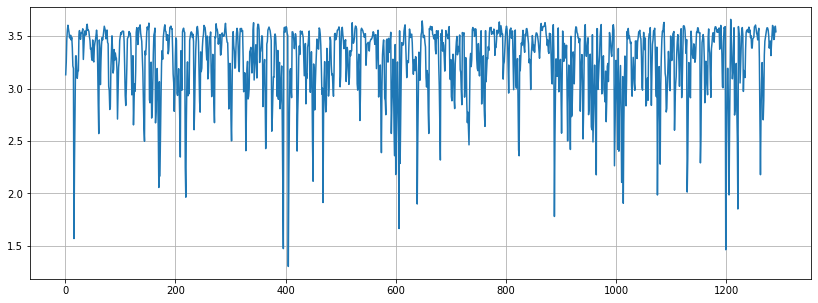

In [0]:
plt.figure(figsize=(14,5))
plt.plot(spectral_entropy(audio_time[n0:n1], sw=12, wlength=2048, overlap=.75))
plt.grid()

In [0]:
def spectral_flux(signal, *args, **kwargs):
  ret = []
  spectra = windows_spectra(signal, *args, **kwargs)
  prev_spec = next(spectra)

  for spec in spectra:
    spec /= spec.sum()
    ret.append(np.sum((spec - prev_spec) ** 2))
    prev_spec = spec

  return ret

In [0]:
def spectral_rolloff(signal, c=0.85, *args, **kwargs):
  ret = []
  for w_spec in windows_spectra(signal, *args, **kwargs):
    target_fraction = c * w_spec.sum()
    # Não precisaria calcular pra todos os valores
    m = np.argmin(np.abs(np.cumsum(w_spec) - target_fraction)) * 10
    ret.append(m)
  
  return ret

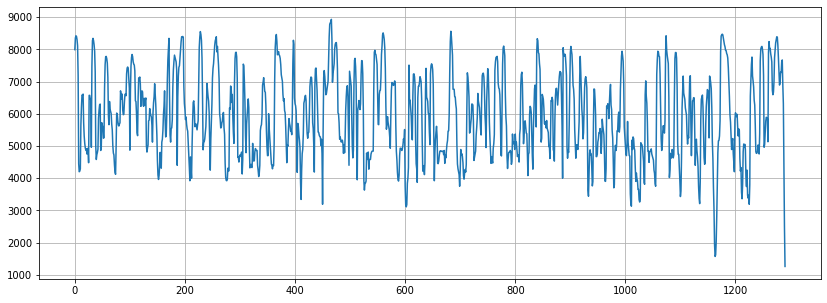

In [0]:
n0 = 0
n1 = audio_time.shape[0] - 1
plt.figure(figsize=(14,5))
plt.plot(spectral_rolloff(audio_time[n0:n1], wlength=2048, overlap=.75))
plt.grid()

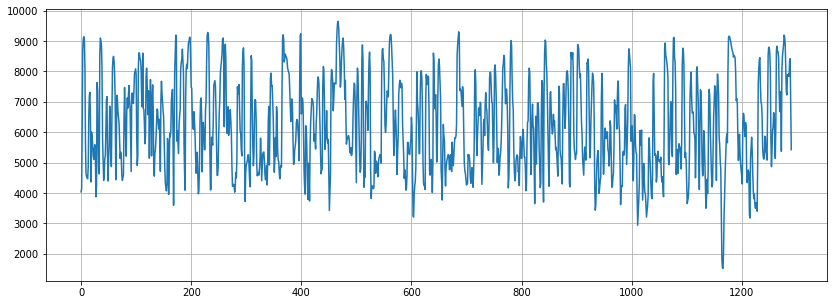

In [0]:
spectral_roff =  librosa.feature.spectral_rolloff(audio_time[n0:n1])
plt.figure(figsize=(14, 5))
plt.plot(spectral_roff[0])
plt.grid()

Spectral Centroid é o centro de "gravidade" do espectro.

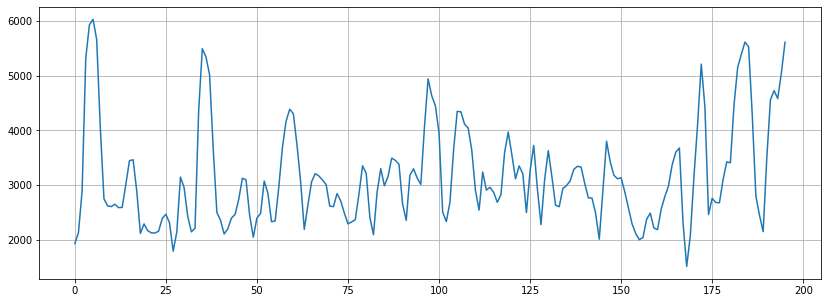

In [0]:
n0 = 0
n1 = 100000

# Plotando o grafico de zero crossing rate da librosa
zero_rate = librosa.feature.spectral_centroid(audio_time[n0:n1])
plt.figure(figsize=(14, 5))
plt.plot(zero_rate[0])
plt.grid()


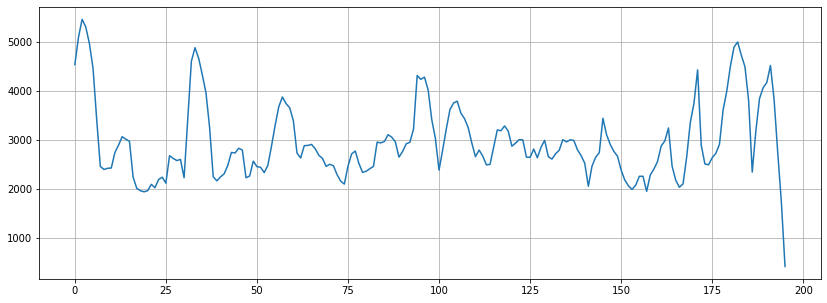

In [0]:
plt.figure(figsize=(14,5))
plt.plot(spectral_centroid(audio_time[n0:n1], wlength=2048, overlap=.75))
plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


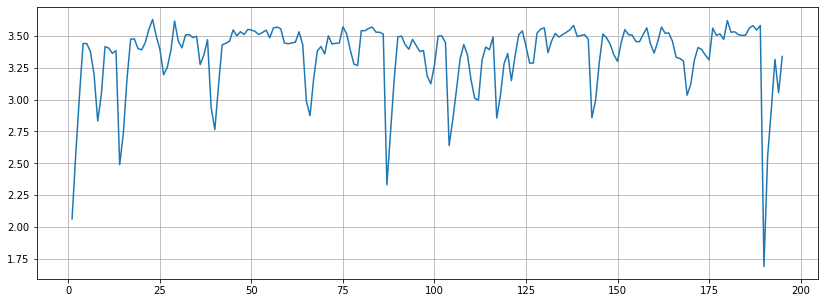

In [0]:
plt.figure(figsize=(14,5))
plt.plot(spectral_entropy(audio_time[n0:n1], sw=12, wlength=2048, overlap=.75))
plt.grid()

# Carregar áudios da pasta

In [0]:
from pathlib import Path
from tqdm import tqdm_notebook as tqdm

In [0]:
def load_from_dir(dir, format='mp3'):
  dir = Path(dir)
  audios = []
  ids = []
  subdirs = []
  srs = []  # Sampling rates
  
  for audio_path in tqdm(list(dir.glob('**/*.' + format))):
      ids.append(audio_path.stem)
      subdirs.append(audio_path.parent.stem)
      audio, sr = librosa.load(audio_path)
      audios.append(audio)
      srs.append(sr)
    
  return ids, audios, srs, subdirs 

In [0]:
def iter_from_dir(dir, format='mp3'):
  dir = Path(dir)
  
  for audio_path in tqdm(list(dir.glob('**/*.' + format))):
      audio_id = audio_path.stem
      subdir = audio_path.parent.stem
      audio, sr = librosa.load(audio_path)
    
      yield audio_id, audio, sr, subdir 

In [0]:
def safe_open(path, mode):
  if path.exists():
    print(f'{path} exists on filesystem, nothing will be done.')
  else:
    return path.open(mode) 

In [0]:
def extract_from_dir(extractor, name, dir, sep=',',
                     *windows_args, **windows_kwargs):
                     
  out_dir = Path('extracted_features')
  out_dir.mkdir(exist_ok=True)
  out_path = out_dir / (name + '.csv')
  
  print('Abrindo arquivo de saída...')
  out_file = safe_open(out_path, 'w')
  if out_file is None:
    return None
    
  header1 = sep.join(('track_id', 'class', 'sampling_rate', name))
  out_file.write(header1 + '\n')
  
  print('Descobrindo arquivos...')
  first = True
  for audio_id, audio, sr, subdir in iter_from_dir(dir): 
    try:
      feature = extractor(audio)
      
      if first:
        header2 = ['']*3 + list(range(len(feature)))
        first=False
        print('Extraindo...')
      
      line = sep.join(str(i) for i in (audio_id, subdir, sr)) + sep + sep.join(feature.astype(str))
      
    except:
      print(f'WARNING: erro no arquivo {audio_id}, subdiretório {subdir}. Pulando.')
      line = sep.join(str(i) for i in (audio_id, subdir, sr))
    
    out_file.write(line + '\n')
  
  out_file.close()

In [0]:
extractors = [
              librosa.feature.spectral_centroid,
              librosa.feature.spectral_rolloff,
              librosa.feature.zero_crossing_rate,
              librosa.feature.spectral_bandwidth,
              librosa.feature.mfcc,
              librosa.feature.rmse,
              librosa.feature.spectral_contrast,
             ]

extractors_names = [
                   'spectral_centroid',
                   'spectral_rollof',
                   'zero_crossing_rate',
                   'spectral_bandwidth',
                   'mfcc',
                   'rmse',
                   'spectral_contrast',
]

In [0]:
for extractor, name in zip(extractors, extractors_names):
  print('EXTRAINDO', name.upper())
  extract_from_dir(lambda x: extractor(x)[0], name, 'fma_small')